### instruction 1 : pipeline that extracts features by combining PCA and SVM aclassififier

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)
X = data.data
Y = data.target
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('SVM', SVC(kernel="linear")))
model = Pipeline(estimators)
X_features = feature_union.fit(X, Y).transform(X)

In [38]:
X_features = feature_union.fit(X, Y).transform(X)

In [47]:
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.943796992481


### Instruction 6: Decomposition (PCA)
### Instruction 4: Provide an example of K-means Clustering using your dataset

In [102]:
from sklearn.decomposition import PCA as sklearnPCA
X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(sklearn_pca.explained_variance_ratio_)

[ 0.44272026  0.18971182]


In [103]:
from sklearn.cluster import KMeans
kValues = []
SSE = []
for k in range(1,14):
    kMean = KMeans(n_clusters=k)
    kMean = kMean.fit(X_std)
    SSE.append(kMean.inertia_)
    kValues.append(k)

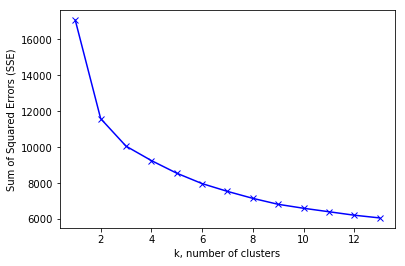

In [104]:
plt.plot(kValues, SSE, 'bx-')
plt.xlabel('k, number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

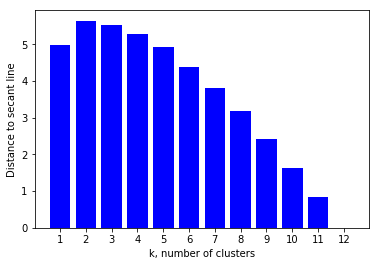

In [106]:
bars = plt.bar(x,y, color='blue')
plt.xlabel('k, number of clusters')
plt.ylabel('Distance to secant line')
plt.xticks(x)
plt.show()

In [105]:
x = []
y = []
end0 = np.array([kValues[0],SSE[0]])
end1 = np.array([kValues[len(SSE)-1],SSE[len(SSE)-1]])
for i in range(1,13):
    x.append(i)
    point = np.array([kValues[i],SSE[i]])
    distancePointToSecant = np.linalg.norm(np.cross(end1-end0, end0-point))/np.linalg.norm(end1-end0)
    y.append(distancePointToSecant)

In [107]:
kMean = KMeans(n_clusters=2, init="k-means++", n_init=10)
kMeanPredict = kMean.fit_predict(X)
clusterCenters = kMean.cluster_centers_

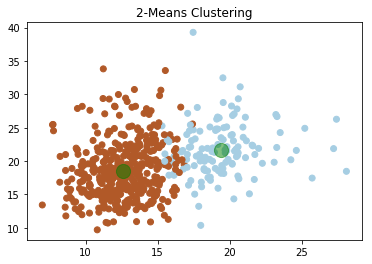

In [108]:
plt.scatter(X[:,0], X[:,1], c=kMeanPredict, cmap=plt.cm.Paired)
plt.title("2-Means Clustering")
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='green', s=200, alpha=0.5);
plt.show()

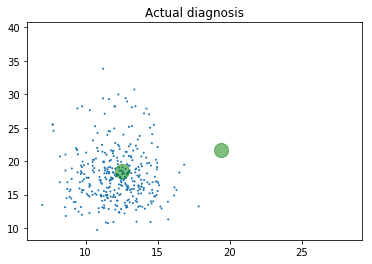

In [110]:
plt.scatter(X[:,0], X[:,1], Y, cmap=plt.cm.Paired)
plt.title("Actual diagnosis")
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='green', s=200, alpha=0.5);
plt.show()

### Instruction 5: different cross decomposition methods

In [123]:
dataset = datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, y_train)
X_train_r, Y_train_r = plsca.transform(X_train, y_train)
X_test_r, Y_test_r = plsca.transform(X_test, y_test)

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


In [124]:
# PLS regression, with multivariate response, a.k.a. PLS2
pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
pls2.predict(X)

array([[-0.14530695],
       [ 0.25944635],
       [-0.02849736],
       [-0.02267293],
       [ 0.34167813],
       [ 0.3640477 ],
       [ 0.19271106],
       [ 0.40077125],
       [ 0.17584771],
       [-0.083453  ],
       [ 0.51825725],
       [ 0.27032631],
       [ 0.24865022],
       [ 0.59633712],
       [ 0.1865637 ],
       [ 0.01854144],
       [ 0.42494154],
       [ 0.03507224],
       [-0.09880688],
       [ 0.73078656],
       [ 0.79586546],
       [ 1.15532188],
       [ 0.24967465],
       [-0.10910603],
       [-0.1059072 ],
       [ 0.02247021],
       [ 0.04886451],
       [ 0.35172616],
       [-0.03595792],
       [ 0.51437875],
       [-0.10394439],
       [ 0.27409308],
       [ 0.0294666 ],
       [-0.10077426],
       [ 0.15435883],
       [ 0.11666944],
       [ 0.38572923],
       [ 1.04583264],
       [ 0.84857083],
       [ 0.41420703],
       [ 0.685392  ],
       [ 0.47101358],
       [-0.14473101],
       [ 0.40192914],
       [ 0.41069797],
       [ 0

In [125]:
# PLS regression, with univariate response, a.k.a. PLS1
pls1 = PLSRegression(n_components=3)
pls1.fit(X, Y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

In [127]:
cca = CCA(n_components=2)
cca.fit(X_train, y_train)
X_train_r, Y_train_r = cca.transform(X_train, y_train)
X_test_r, Y_test_r = cca.transform(X_test, y_test)

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


### Instruction 7:  Comparison of LDA and PCA 2D 

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

explained variance ratio (first two components): [ 0.98137855  0.01862145]


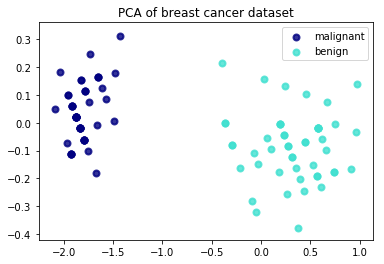

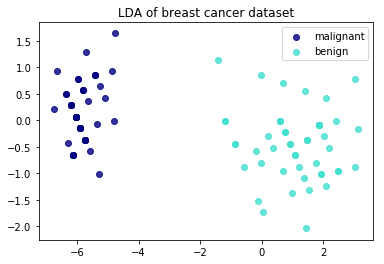

In [139]:
# Percentage of variance explained for each components
data.target[[10, 50, 85]]
target_names = data.target_names
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of breast cancer dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of breast cancer dataset')

plt.show()

In [ ]:
# fit the model
from sklearn import datasets, svm
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    

### Instruction 9: Provide an example of SVM using your dataset

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm

##linear
clf = svm.SVC(gamma=10, kernel ='linear')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        67
          1       0.97      0.97      0.97       121

avg / total       0.96      0.96      0.96       188



### Instruction 10 : Feature Selection - Feature selection using SelectFromModel and LassoCV¶

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


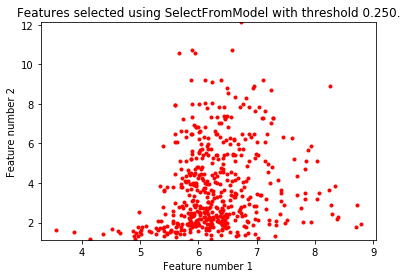

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
# Plot the selected two features from X.
plt.title(
    "Features selected using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


### Instruction 11: Univariate Feature Selection

Automatically created module for IPython interactive environment


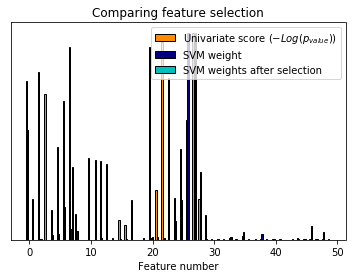

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
breast_cancer = load_breast_cancer()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(breast_cancer.data), 20))

# Add the noisy data to the informative features
X = np.hstack((breast_cancer.data, E))
y = breast_cancer.target

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

### Instruction 13: Provide an example of Plotting multi-class SGD on your dataset - Logistic Regression 3-class Classifier

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = data.data[:, :2] ##'mean radius' and 'mean texture' features
y = data.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [63]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [64]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [65]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

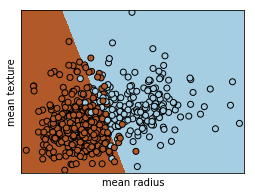

In [66]:
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

### Instruction 17 : Preprocessing - Importance of Feature Scaling


Prediction accuracy for the normal test dataset with PCA
91.81%


Prediction accuracy for the standardized test dataset with PCA
91.81%


PC 1 without scaling:
 [  5.06812127e-03   2.00176762e-03   3.48376453e-02   5.23452415e-01
   3.64311374e-06   3.56976167e-05   7.73235570e-05   4.57185961e-05
   7.26975184e-06  -3.11146853e-06   3.22331624e-04  -4.01140585e-05
   2.25789791e-03   5.81690902e-02  -7.08544186e-07   4.26443004e-06
   7.98447586e-06   2.95091420e-06  -7.62162344e-07  -1.89845423e-07
   7.04081093e-03   2.81731434e-03   4.82672469e-02   8.47925754e-01
   5.55537931e-06   8.43962732e-05   1.54869697e-04   6.90191428e-05
   1.79157621e-05   1.08268771e-07]

PC 1 with scaling:
 [ 0.21692715  0.10684106  0.22602609  0.21959403  0.14197381  0.23873081
  0.26035725  0.26364811  0.14806538  0.05869441  0.20515344  0.03646993
  0.20945384  0.19927449  0.02593568  0.16598312  0.15601627  0.18301435
  0.05403685  0.10320653  0.22630833  0.10738112  0.2360461   0.22394251
  0.12

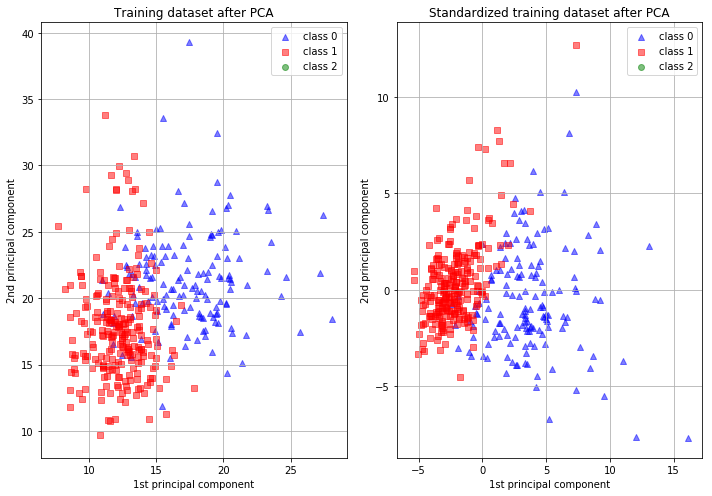

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline

RANDOM_STATE = 42
FIG_SIZE = (10, 7)
features, target = load_breast_cancer(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

### Instruction 20 - Support Vector Machines - Part 2 

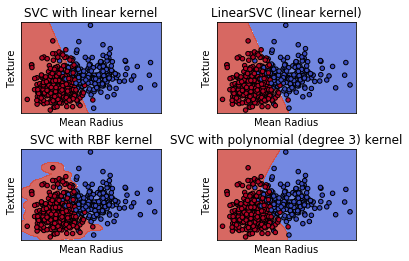

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
bc = datasets.load_breast_cancer()
# Take the first two features. We could avoid this by using a two-dim dataset
X = bc.data[:, :2]
y = bc.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Mean Radius')
    ax.set_ylabel('Texture')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
# Plot the selected two features from X.
plt.title(
    "Features selected using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

